In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

In [4]:
print(os.listdir(r'C:\Users\bendh\OneDrive\Desktop\data'))

['test', 'train']


In [5]:

folder_benign_train = r'C:\Users\bendh\OneDrive\Desktop\data/train/benign'
folder_malignant_train = r'C:\Users\bendh\OneDrive\Desktop\data/train/malignant'

folder_benign_test = r'C:\Users\bendh\OneDrive\Desktop\data/test/benign'
folder_malignant_test = r'C:\Users\bendh\OneDrive\Desktop\data/test/malignant'

read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))



In [6]:
# Load in training pictures 
ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
X_benign = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
X_malignant = np.array(ims_malignant, dtype='uint8')

In [7]:

# Load in testing pictures
ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')

In [8]:
# Create labels
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])



In [9]:
# Merge data 
X_train = np.concatenate((X_benign, X_malignant), axis = 0)
y_train = np.concatenate((y_benign, y_malignant), axis = 0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

In [10]:
# Shuffle data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]
s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]


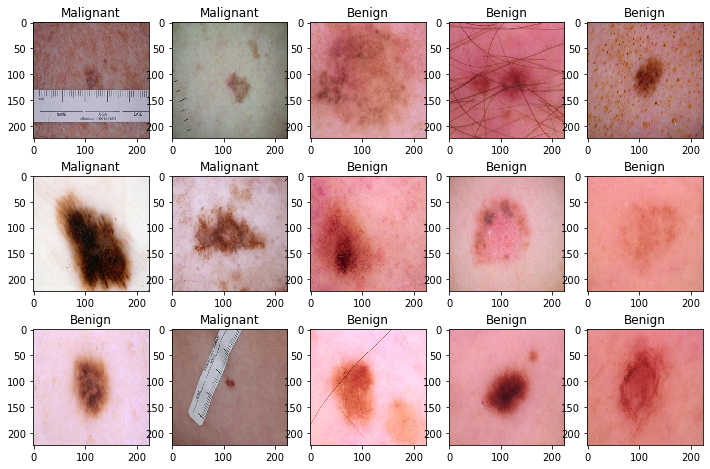

In [11]:
# Displaying first 15 images of moles, and how they are classified
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()


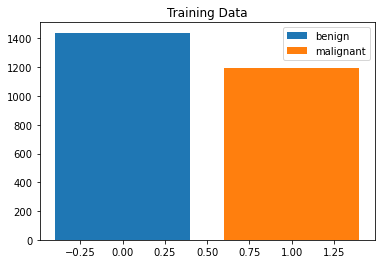

In [12]:
plt.bar(0, y_train[np.where(y_train == 0)].shape[0], label = 'benign')
plt.bar(1, y_train[np.where(y_train == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Training Data")
plt.show()


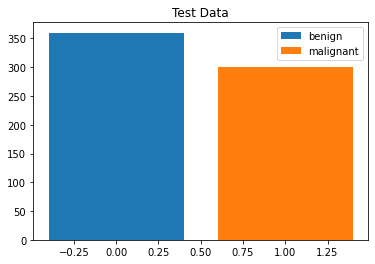

In [13]:
plt.bar(0, y_test[np.where(y_test == 0)].shape[0], label = 'benign')
plt.bar(1, y_test[np.where(y_test == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Test Data")
plt.show()

In [14]:
X_train = X_train/255.
X_test = X_test/255.

# support vector machine classifier

In [15]:
# Flatten the image data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [16]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

In [18]:
# Reduce dimensionality for visualization
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [19]:
# Fit SVM model
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear'))
svm_model.fit(X_train_flat, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [20]:
# Calculate accuracy
accuracy = svm_model.score(X_test_flat, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7666666666666667


# CNN

In [31]:
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [32]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [33]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
83/83 [==============================] - 84s 988ms/step - loss: 0.7245 - accuracy: 0.6231 - val_loss: 0.5097 - val_accuracy: 0.7424
Epoch 2/10
83/83 [==============================] - 104s 1s/step - loss: 0.4697 - accuracy: 0.7656 - val_loss: 0.6399 - val_accuracy: 0.6485
Epoch 3/10
83/83 [==============================] - 128s 2s/step - loss: 0.4759 - accuracy: 0.7619 - val_loss: 0.4249 - val_accuracy: 0.7985
Epoch 4/10
83/83 [==============================] - 122s 1s/step - loss: 0.4106 - accuracy: 0.7876 - val_loss: 0.4546 - val_accuracy: 0.7561
Epoch 5/10
83/83 [==============================] - 117s 1s/step - loss: 0.3837 - accuracy: 0.8055 - val_loss: 0.4034 - val_accuracy: 0.7909
Epoch 6/10
83/83 [==============================] - 146s 2s/step - loss: 0.3925 - accuracy: 0.8089 - val_loss: 0.3662 - val_accuracy: 0.8242
Epoch 7/10
83/83 [==============================] - 128s 2s/step - loss: 0.3544 - accuracy: 0.8244 - val_loss: 0.3511 - val_accuracy: 0.8212
Epoch 8/10


In [34]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

21/21 [==============================] - 6s 294ms/step - loss: 0.3785 - accuracy: 0.8242
Test accuracy: 0.8242424130439758


1/1 [==============================] - 0s 70ms/step


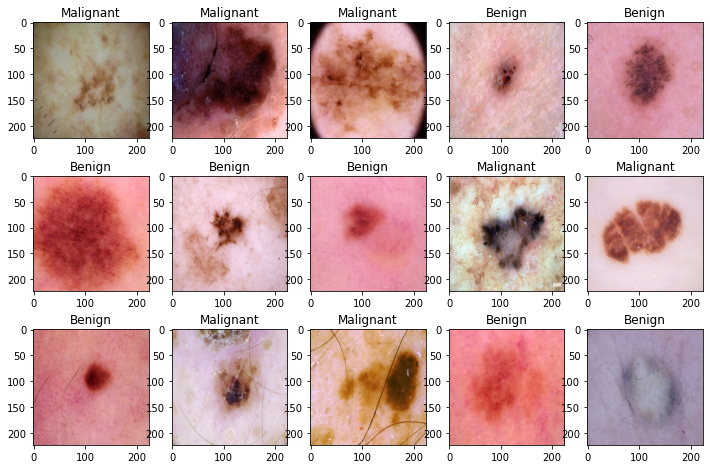

In [35]:
# Visualize predictions
fig = plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns * rows + 1):
    ax = fig.add_subplot(rows, columns, i)
    img_index = np.random.randint(0, len(X_test))
    img = X_test[img_index]
    prediction = model.predict(np.expand_dims(img, axis=0))[0][0]
    if prediction < 0.5:
        label = 'Benign'
    else:
        label = 'Malignant'
    ax.title.set_text(label)
    plt.imshow(img)
plt.show()

# RandomForestClassifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Flatten the image data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


In [37]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

In [38]:
# Reduce dimensionality for visualization
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [39]:
# Fit Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_flat, y_train)


RandomForestClassifier(random_state=42)

In [40]:
# Calculate accuracy
accuracy = rf_model.score(X_test_flat, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8227272727272728


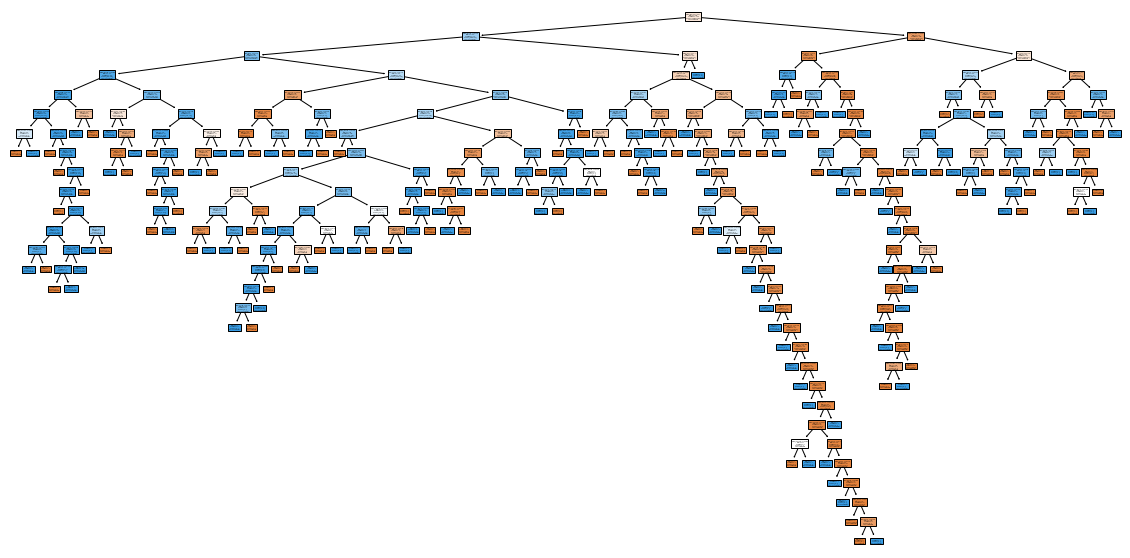

In [43]:
from sklearn.tree import plot_tree

tree_index = 0  
chosen_tree = rf_model.estimators_[tree_index]
plt.figure(figsize=(20, 10))
plot_tree(chosen_tree, filled=True, feature_names=[f'pixel_{i}' for i in range(X_train_flat.shape[1])], class_names=['Benign', 'Malignant'])
plt.show()